In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("housing.csv")

# Drop ocean_proximity
df = df.drop(columns=["ocean_proximity"])

# Separate features and target
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

# Impute missing values (median works best for this dataset)
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.6138664756435199
RMSE: 71133.17349286003


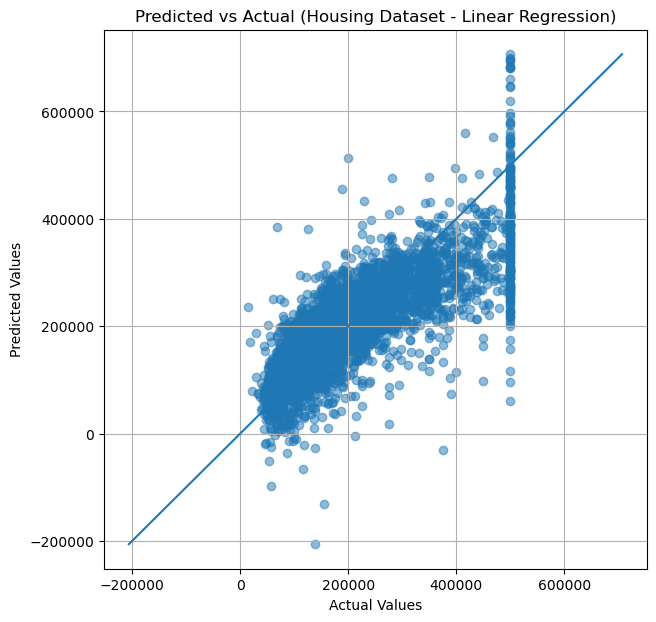

In [27]:
plt.figure(figsize=(7, 7))

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (Housing Dataset - Linear Regression)")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.grid(True)
plt.show()
